In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model25_0 = Model3(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x,pool1 = nn.AvgPool2d, pool2 = nn.MaxPool2d),
    post_conv=post_conv0,
)
he_initialization(model25_0)
describe(model25_0)

MACs: 25.07 MMac, Params: 3.5 k
Layer (type:depth-idx)                   Output Shape              Param #
Model3                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-4               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-5              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 6

Loading checkpoint from model_weights/model25_0.pt
Starting
Epoch 1/10: Train loss = 0.5858, Train accuracy = 0.6882, Test loss = 0.5890, Test accuracy = 0.6786


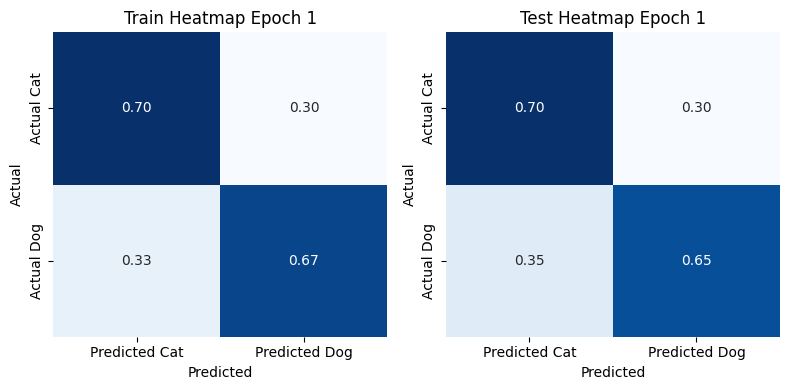

Epoch 2/10: Train loss = 0.5288, Train accuracy = 0.7385, Test loss = 0.5402, Test accuracy = 0.7302


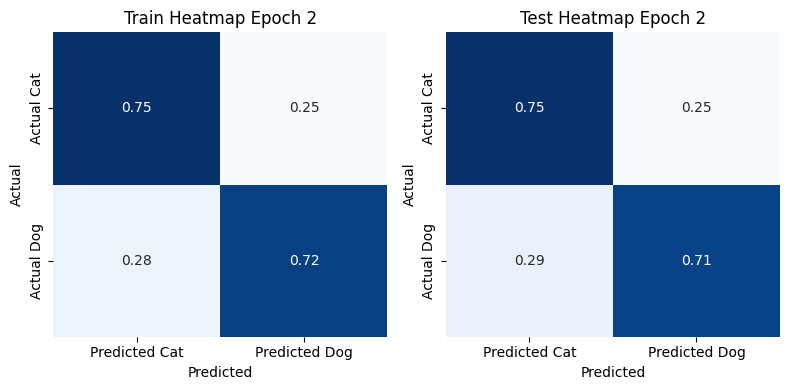

Epoch 3/10: Train loss = 0.5226, Train accuracy = 0.7409, Test loss = 0.5255, Test accuracy = 0.7374


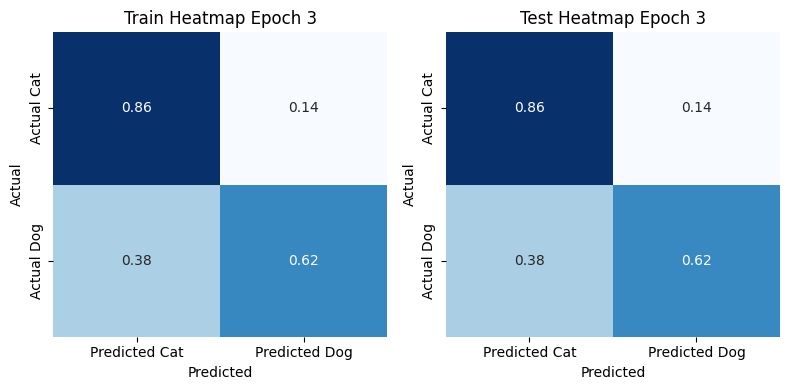

Epoch 4/10: Train loss = 0.5436, Train accuracy = 0.7243, Test loss = 0.5542, Test accuracy = 0.7217


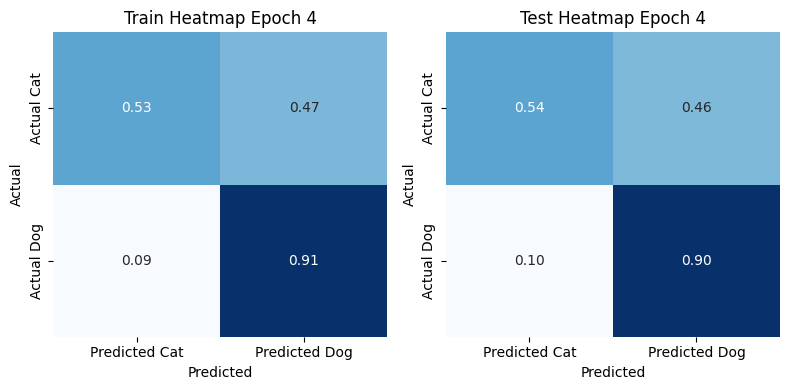

Epoch 5/10: Train loss = 0.4482, Train accuracy = 0.7948, Test loss = 0.4703, Test accuracy = 0.7776


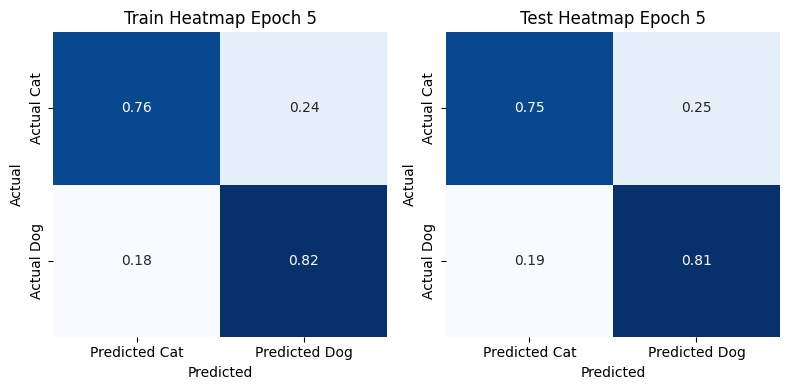

Epoch 6/10: Train loss = 0.4507, Train accuracy = 0.7908, Test loss = 0.4792, Test accuracy = 0.7779


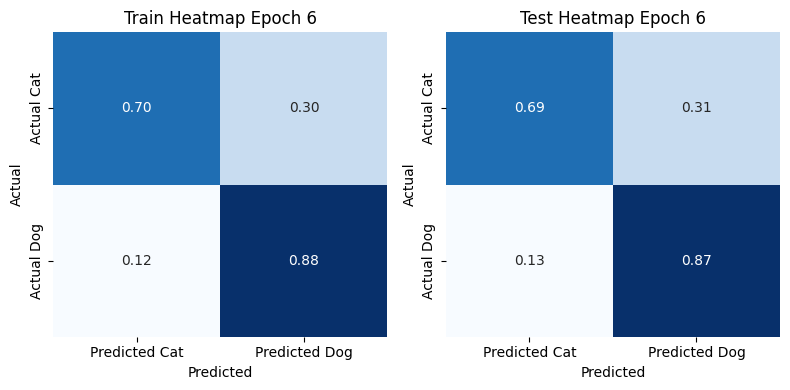

Epoch 7/10: Train loss = 0.4251, Train accuracy = 0.8046, Test loss = 0.4469, Test accuracy = 0.7907


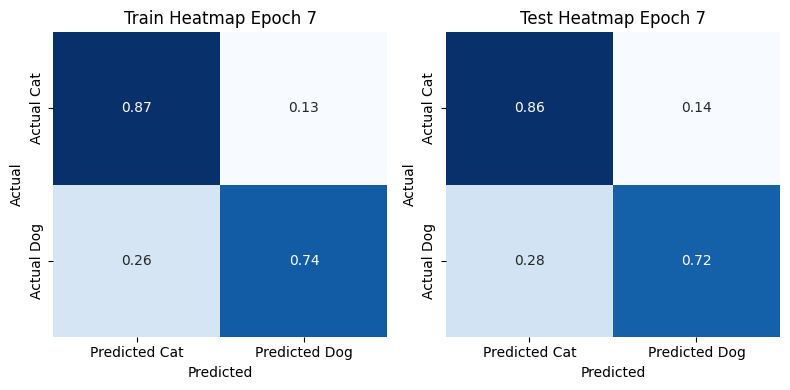

Epoch 8/10: Train loss = 0.3995, Train accuracy = 0.8216, Test loss = 0.4251, Test accuracy = 0.8040


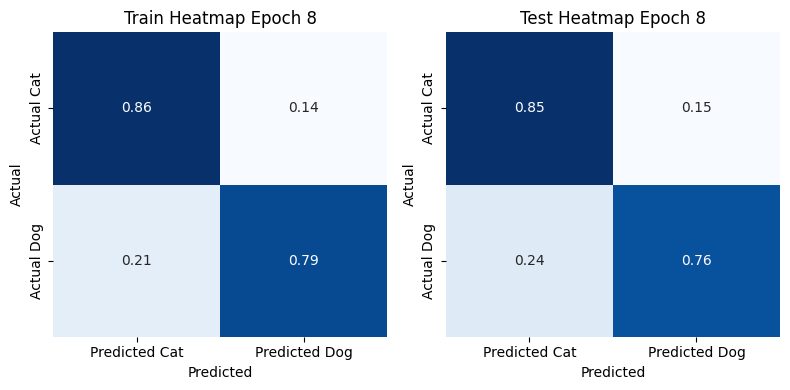

Epoch 9/10: Train loss = 0.3898, Train accuracy = 0.8248, Test loss = 0.4198, Test accuracy = 0.8076


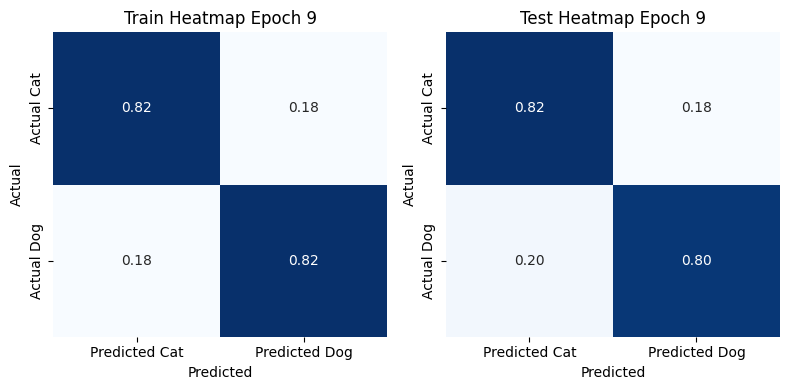

Epoch 10/10: Train loss = 0.3891, Train accuracy = 0.8271, Test loss = 0.4189, Test accuracy = 0.8073


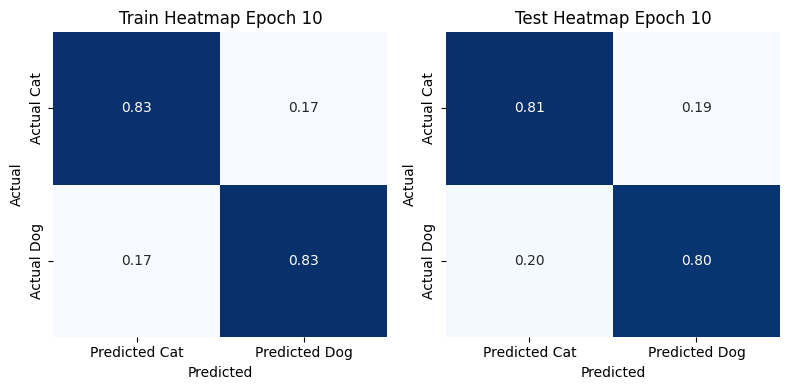

Training complete.


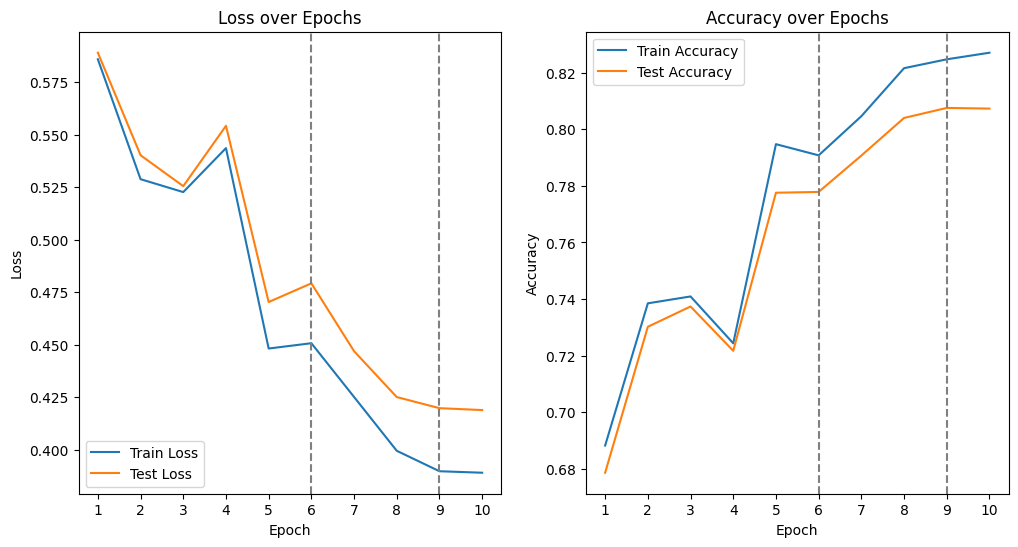

In [5]:
train(model25_0,"model_weights/model25_0.pt",criterion,train_dataset,test_dataset)